In [129]:
import os 
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [130]:
cwd = "C:/Users/Luca/Desktop"
os.chdir(cwd)

In [131]:
M = pd.read_csv("data5.csv")
M.head()

,Unnamed: 0,m1,m2,m3,m4,m5
0,1,1,0,1,12,8
1,2,2,1,0,12,11
2,3,0,1,2,5,11
3,4,13,10,10,1,3
4,5,1,0,0,11,11


In [132]:
#Drop first column as it is a repetition of the index
M = M.drop(["Unnamed: 0"], axis = 1)
M.head(1)

,m1,m2,m3,m4,m5
0,1,0,1,12,8


In [133]:
np.linalg.matrix_rank(M)

5

In [145]:
#Compute full svds elements and decompose them
SVD = np.linalg.svd(M)
U,D,V = pd.DataFrame(SVD[0]), pd.DataFrame(SVD[1]), pd.DataFrame(SVD[2])
U.head()
U = U.iloc[:, :5]

In [87]:
#Compute the energy of the matrix
tot_ener = sum(D**2)
par_ener = sum(D[0:2]**2)

#Compute the residual energy
res_ener = par_ener/tot_ener
print(res_ener)

0.9459298436974727


In [144]:
#We can see that we can drop the three smaller singular values as we retain 94% of the total energy
#We can compute the rank 2 svd matrices
D2 = D[0:2]
V2 = V[0:2]

[[13.46126803 -4.44857279]
 [15.64823902 -4.72529361]
 [11.11602324 -2.85767596]
 [10.08143811 16.4725139 ]
 [14.55602481 -5.52621846]
 [16.70310039 -5.85321445]
 [ 7.68296854 13.04171728]
 [13.47225459 -4.45187068]
 [ 8.14189711 17.2575816 ]
 [14.60377733 -5.56907454]
 [ 8.49249823 16.41396791]
 [13.46482984 -4.44443513]
 [10.86122513 -3.34049597]
 [12.59064776 -4.72298179]
 [ 6.35544659 14.87304917]]


In [166]:
#let's look for the similarity between all customers by computing the score_users This is the first way to classify users based on their opinions
svd = TruncatedSVD(n_components=2)
svd.fit(M)
score_users = svd.transform(M)
abssu = pd.DataFrame(abs(score_users))
abssu

,0,1
0,13.461268,4.448573
1,15.648239,4.725294
2,11.116023,2.857676
3,10.081438,16.472514
4,14.556025,5.526218
5,16.703100,5.853214
6,7.682969,13.041717
7,13.472255,4.451871
8,8.141897,17.257582
9,14.603777,5.569075


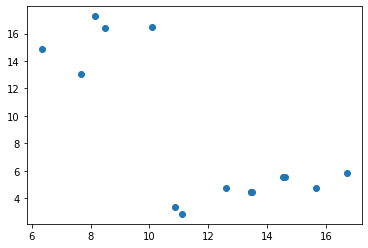

In [167]:
#Let's plot the score_users matrix
plt.scatter(abssu[0], abssu[1])